# Some quick postprocessing of MOM6 data to generate SST and OHT figures

## Dependencies:
- xarray
- numpy
- cartopy
- matplotlib

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings

#=================================================
# Modify paths to point to output files
#=================================================
# Case name
case = 'Straight Coast'

# path to ocean_annual file
path_year = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy = xr.open_dataset(path_year, decode_times=True)

# path to ocean_month file
path_month = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_month.nc'
dm = xr.open_dataset(path_month, decode_times=True)

# path to save figures
fig_path = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/FIGURES/'


#=================================================
# Ignore runtime warnings: mean of empty slice
#=================================================
warnings.filterwarnings("ignore", message="Mean of empty slice")

#=================================================
# Modify latitudes to point to western and eastern
# boundaries of small basin and northern extent of SO.
# Comment out for AQUA and RIDGE cases. 
#=================================================
x_west = np.where(dy['xh']==211)[0][0]
x_east = np.where(dy['xh']==351)[0][0]
y = np.where(dy['yq']==-35)[0][0]
y_south = np.where(dy['yq']==-71)[0][0]
y_north = np.where(dy['yq']==71)[0][0]

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


# Functions used in this notebook

In [2]:
def calculate_OHT(T_ady_2d, T_diffy_2d):
    tady = np.where(np.abs(T_ady_2d) == 1e+20, np.nan, T_ady_2d)
    tady_avg = np.nanmean(tady, axis=0)
    tady_zonal = np.nansum(tady_avg, axis=1)
    tdiffy = np.where(np.abs(T_diffy_2d) == 1e+20, np.nan, T_diffy_2d)
    tdiffy_avg = np.nanmean(tdiffy, axis=0)
    tdiffy_zonal = np.nansum(tdiffy_avg, axis=1)
    OHT = (tady_zonal + tdiffy_zonal)/1e15
    return OHT


def plot_salt_section(title, lon_index, z):
    t = np.linspace(33, 38, 11, endpoint=True)
    b = np.linspace(33, 38, 21, endpoint=True)
    lon = np.asarray(dy['xh'][lon_index])
    fig, ax = plt.subplots(figsize=(9,5))
    cf = ax.contourf(dy['yh'], dy['zl'][0:z], np.squeeze(salt[:z,:,lon_index]), b, extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title(title+' '+'Salinity Section at'+' '+'{}'.format(lon)+'E', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[psu]', fontsize=12)
#     plt.savefig(fig_path+'{}_salt_section_{}.png'.format(title, lon))
    plt.show()
    return

def plot_temp_section(title, lon_index, z):
    t = np.linspace(-5, 30, 11, endpoint=True)
    b = np.linspace(-5, 30, 21, endpoint=True)
    lon = np.asarray(dy['xh'][lon_index])
    fig, ax = plt.subplots(figsize=(9,5))
    cf = ax.contourf(dy['yh'], dy['zl'][0:z], np.squeeze(temp[:z,:,lon_index]), b, cmap='coolwarm', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title(title+' '+'Temperature Section at'+' '+'{}'.format(lon)+'E', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[C]', fontsize=12)
#     plt.savefig(fig_path+'{}_temp_section_{}.png'.format(title, lon))
    plt.show()
    return

# Look at global mean SST and SSS

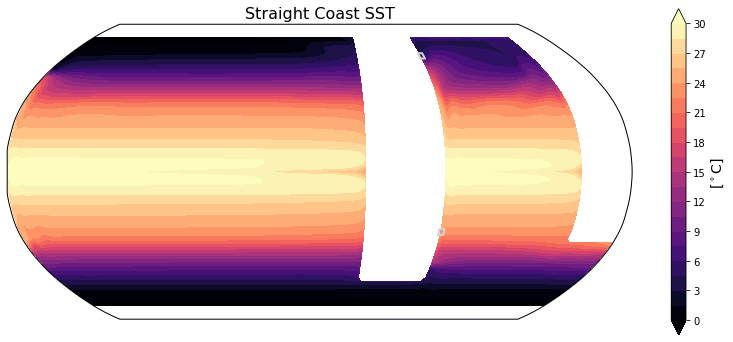

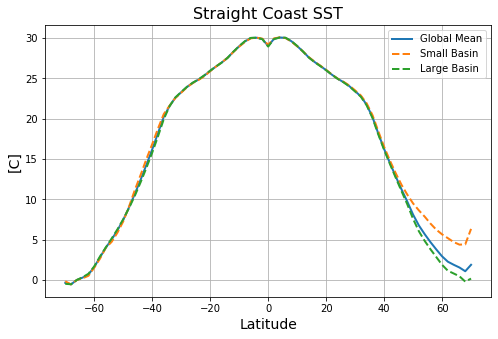

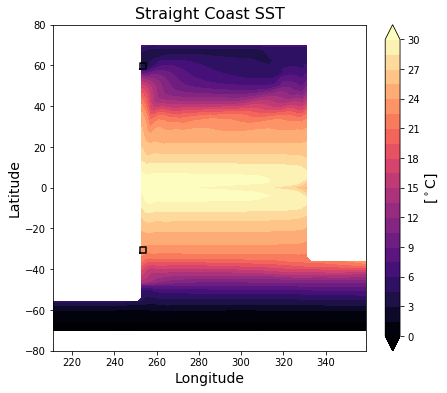

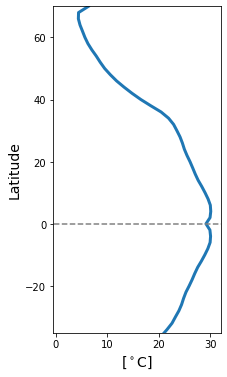

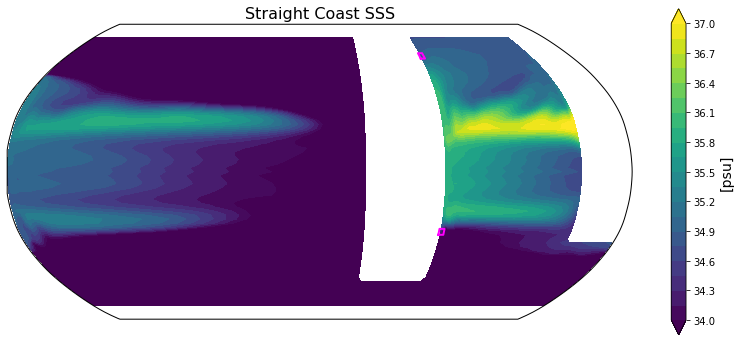

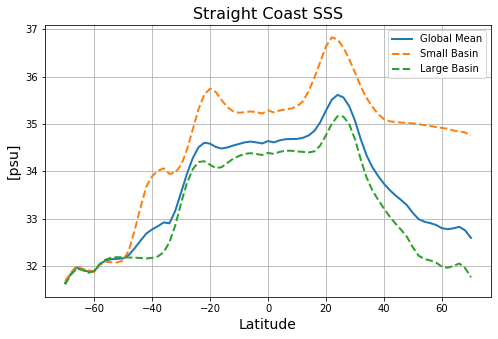

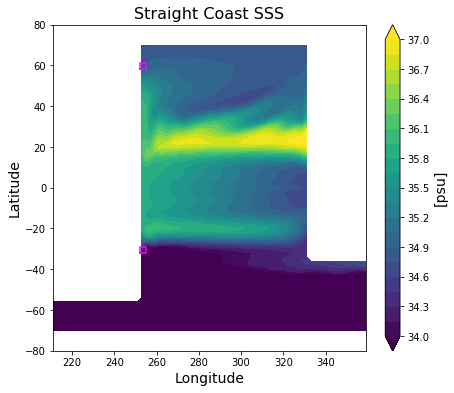

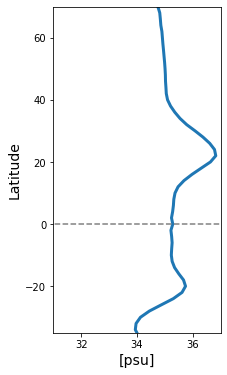

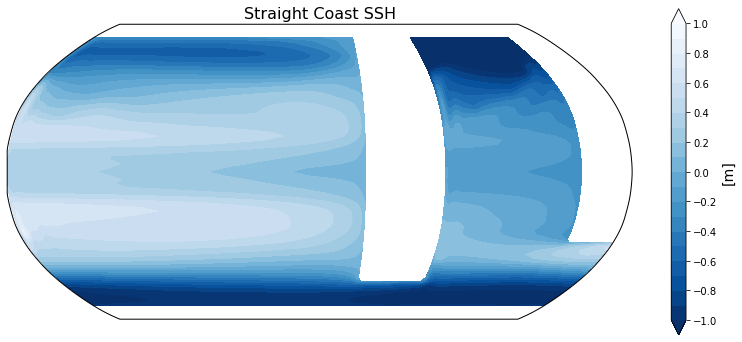

In [10]:
sst_avg = np.nanmean(dy['tos'], axis=0)
sss_avg = np.nanmean(dy['sos'], axis=0)
ssh_avg = np.nanmean(dy['zos'], axis=0)

x = [252, 252, 255, 255, 252] # for straight coast
# x = [238, 238, 241, 241, 238] # for wide coast
y_n = [58, 61, 61, 58, 58]
y_s = [-32,-29,-29,-32,-32]

#######
# SST

b = np.linspace(0, 30, 21, endpoint=True)
t = np.linspace(0, 30, 11, endpoint=True)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(dy['xh'], dy['yh'], sst_avg, b, cmap='magma', extend='both',  transform=ccrs.PlateCarree())
plt.plot(x, y_n, color='lightgray', transform=ccrs.PlateCarree(), linewidth=2)
plt.plot(x, y_s, color='lightgray', transform=ccrs.PlateCarree(), linewidth=2)
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('{} SST'.format(case), fontsize=16)
# plt.savefig(fig_path+'SST.png')
plt.show()

plt.subplots(figsize=(8,5))
plt.plot(dy['yh'], np.nanmean(sst_avg, axis=1), linewidth=2, label='Global Mean')
# Following two lines are for configurations with more than one basin
plt.plot(dy['yh'], np.nanmean(sst_avg[:,x_west:x_east], axis=1), '--',linewidth=2, label='Small Basin')
plt.plot(dy['yh'], np.nanmean(sst_avg[:,:x_west], axis=1), '--', linewidth=2, label='Large Basin')
#
plt.ylabel('[C]', fontsize=14), plt.xlabel('Latitude', fontsize=14)
plt.title('{} SST'.format(case), fontsize=16)
plt.grid()
plt.legend()
# plt.savefig(fig_path+'SST_section.png')
plt.show()

fig = plt.figure(figsize=(7, 6))
plt.contourf(dy['xh'], dy['yh'], sst_avg, b, cmap='magma', extend='both')
plt.plot(x, y_n, color='k')#, transform=ccrs.PlateCarree(), linewidth=2)
plt.plot(x, y_s, color='k')#, transform=ccrs.PlateCarree(), linewidth=2)
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('{} SST'.format(case), fontsize=16)
plt.xlim([211,359])
# plt.savefig(fig_path+'SST.png')
plt.show()

fig = plt.figure(figsize=(3, 6))
plt.plot(np.nanmean(sst_avg[:,x_west:x_east], axis=1), dy['yh'], linewidth=3)
# plt.plot([0,0], [-90,90], linestyle='dashed', color='gray')
plt.plot([-5,40], [0,0], linestyle='dashed', color='gray')
plt.ylim([-35,70]), plt.xlim([-0.5,32])
plt.xlabel('[$^\circ$C]', fontsize=14), plt.ylabel('Latitude', fontsize=14)
plt.show()


#######
# SSS

b_salt = np.linspace(34, 37, 21, endpoint=True)
t_salt = np.linspace(34, 37, 11, endpoint=True)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(dy['xh'], dy['yh'], sss_avg, b_salt, extend='both',  transform=ccrs.PlateCarree())
plt.plot(x, y_n, color='magenta', transform=ccrs.PlateCarree(), linewidth=2)
plt.plot(x, y_s, color='magenta', transform=ccrs.PlateCarree(), linewidth=2)
cbar = plt.colorbar(ticks=t_salt, boundaries=t_salt, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[psu]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('{} SSS'.format(case), fontsize=16)
# plt.savefig(fig_path+'SSS.png')
plt.show()

plt.subplots(figsize=(8,5))
plt.plot(dy['yh'], np.nanmean(sss_avg, axis=1), linewidth=2, label='Global Mean')
# Following two lines are for configurations with more than one basin
plt.plot(dy['yh'], np.nanmean(sss_avg[:,x_west:x_east], axis=1), '--', linewidth=2, label='Small Basin')
plt.plot(dy['yh'], np.nanmean(sss_avg[:,:x_west], axis=1), '--', linewidth=2, label='Large Basin')
#
plt.ylabel('[psu]', fontsize=14), plt.xlabel('Latitude', fontsize=14)
plt.title('{} SSS'.format(case), fontsize=16)
plt.grid()
plt.legend()
# plt.savefig(fig_path+'SSS_section.png')
plt.show()

fig = plt.figure(figsize=(7, 6))
plt.contourf(dy['xh'], dy['yh'], sss_avg, b_salt, extend='both')
plt.plot(x, y_n, color='magenta')#, transform=ccrs.PlateCarree(), linewidth=2)
plt.plot(x, y_s, color='magenta')#, transform=ccrs.PlateCarree(), linewidth=2)
cbar = plt.colorbar(ticks=t_salt, boundaries=t_salt, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[psu]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('{} SSS'.format(case), fontsize=16)
plt.xlim([211,359])
# plt.savefig(fig_path+'SSS.png')
plt.show()

fig = plt.figure(figsize=(3, 6))
plt.plot(np.nanmean(sss_avg[:,x_west:x_east], axis=1), dy['yh'], linewidth=3)
# plt.plot([0,0], [-90,90], linestyle='dashed', color='gray')
plt.plot([-5,40], [0,0], linestyle='dashed', color='gray')
plt.ylim([-35,70]), plt.xlim([31,37])
plt.xlabel('[psu]', fontsize=14), plt.ylabel('Latitude', fontsize=14)
plt.show()

b_ssh = np.linspace(-1, 1, 21, endpoint=True)
t_ssh = np.linspace(-1, 1, 11, endpoint=True)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(dy['xh'], dy['yh'], ssh_avg, b_ssh, cmap='Blues_r', extend='both',  transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t_ssh, boundaries=t_ssh, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[m]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('{} SSH'.format(case), fontsize=16)
plt.show()

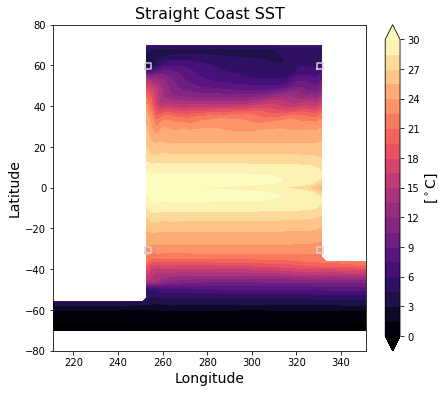

In [4]:
x = [252, 252, 255, 255, 252] # for straight coast
x_e = [329, 329, 332, 332, 329] 
y_n = [58, 61, 61, 58, 58]
y_s = [-32,-29,-29,-32,-32]

fig = plt.figure(figsize=(7, 6))
plt.contourf(dy['xh'], dy['yh'], sst_avg, b, cmap='magma', extend='both')

plt.plot(x, y_n, color='lightgray')#, transform=ccrs.PlateCarree(), linewidth=2)
plt.plot(x, y_s, color='lightgray')#, transform=ccrs.PlateCarree(), linewidth=2)

plt.plot(x_e, y_n, color='lightgray')#, transform=ccrs.PlateCarree(), linewidth=2)
plt.plot(x_e, y_s, color='lightgray')#, transform=ccrs.PlateCarree(), linewidth=2)

cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('{} SST'.format(case), fontsize=16)
plt.xlim([211,351])
# plt.savefig(fig_path+'SST.png')
plt.show()

# Calculate and plot meridional ocean heat transport

In [5]:
dm.T_ady_2d

<xarray.DataArray 'T_ady_2d' (time: 1200, yq: 81, xh: 180)>
[17496000 values with dtype=float32]
Coordinates:
  * xh       (xh) float64 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) object 2800-01-16 12:00:00 ... 2899-12-16 12:00:00
  * yq       (yq) float64 -79.0 -77.0 -75.0 -73.0 -71.0 ... 75.0 77.0 79.0 81.0
Attributes:
    long_name:      Vertically Integrated Advective Meridional Flux of Heat
    units:          W m-2
    cell_methods:   yq:point xh:sum time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  none

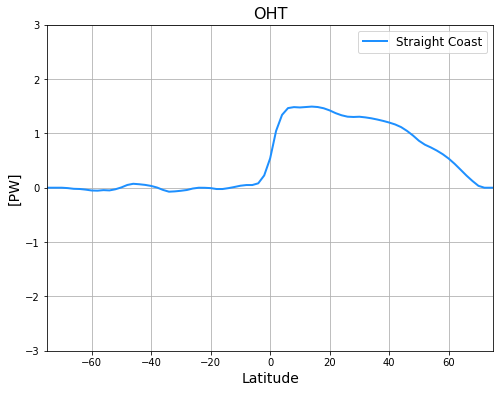

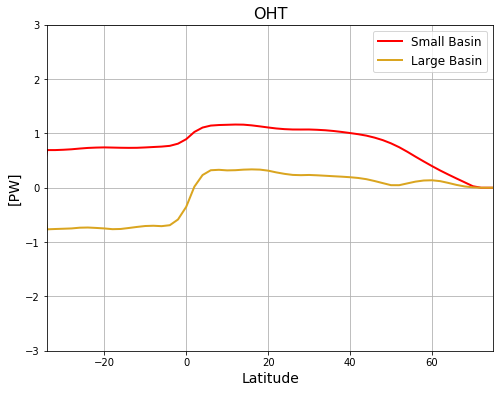

In [6]:
OHT = calculate_OHT(dm.T_ady_2d, dm.T_diffy_2d)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm['yq']+1, OHT, color='dodgerblue', linewidth=2, label=case)
plt.title('OHT', fontsize=16)
plt.grid()
plt.xlim(-75,75)
plt.ylim(-3, 3)
plt.legend(fontsize=12)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[PW]', fontsize=14)
# plt.savefig(fig_path+'OHT_global.png')
plt.show()

OHT_small = calculate_OHT(dm.T_ady_2d.isel(xh=slice(x_west,x_east)), dm.T_diffy_2d.isel(xh=slice(x_west,x_east)))
OHT_large = calculate_OHT(dm.T_ady_2d.isel(xh=slice(0,x_west)), dm.T_diffy_2d.isel(xh=slice(0,x_west)))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm['yq']+1, OHT_small, color='red', linewidth=2, label='Small Basin')
ax.plot(dm['yq']+1, OHT_large, color='goldenrod', linewidth=2, label='Large Basin')
plt.title('OHT', fontsize=16)
plt.grid()
plt.xlim(-34,75)
plt.ylim(-3, 3)
plt.legend(fontsize=12)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[PW]', fontsize=14)
# plt.savefig(fig_path+'OHT_basins.png')
plt.show()

# Plot salinity and temperature sections

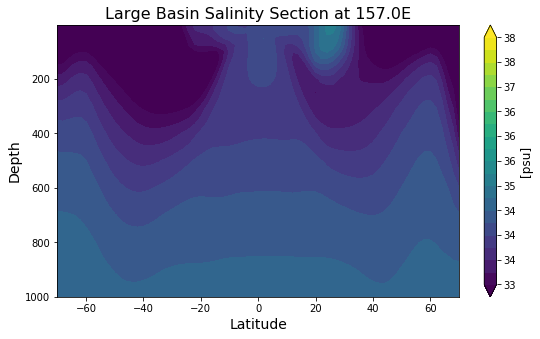

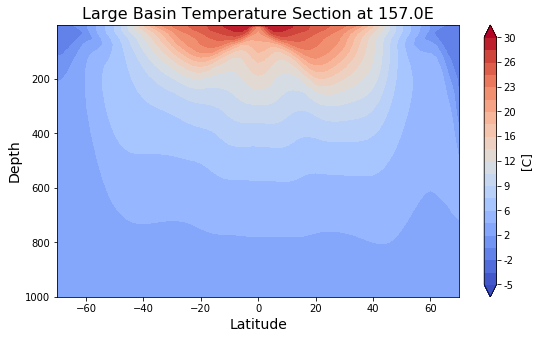

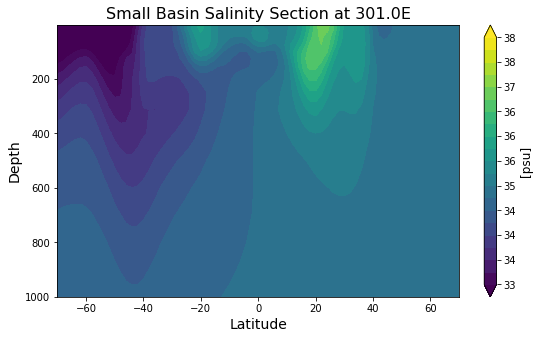

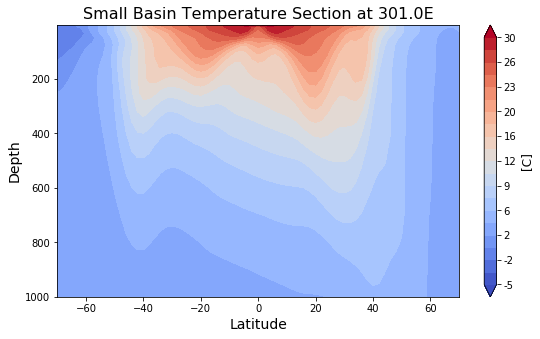

In [7]:
salinity = dy['so'][:]
temperature = dy['thetao'][:]
salt = np.nanmean(salinity[-361:,:,:,:], axis=0)
temp = np.nanmean(temperature[-361:,:,:,:], axis=0)
z = np.where(dy['zl'] == 1000)[0][0] + 1

plot_salt_section('Large Basin', 78, z)
plot_temp_section('Large Basin', 78, z)
plot_salt_section('Small Basin', 150, z)
plot_temp_section('Small Basin', 150, z)

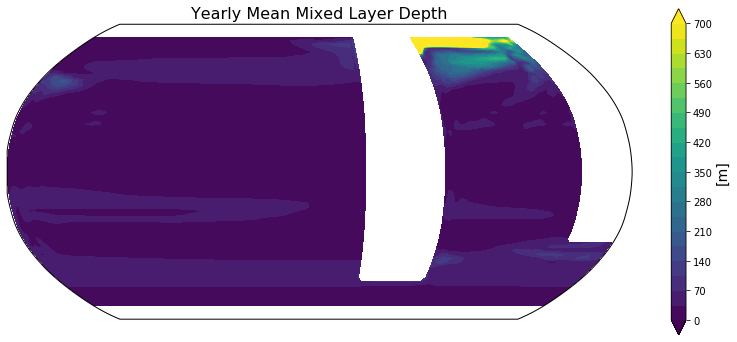

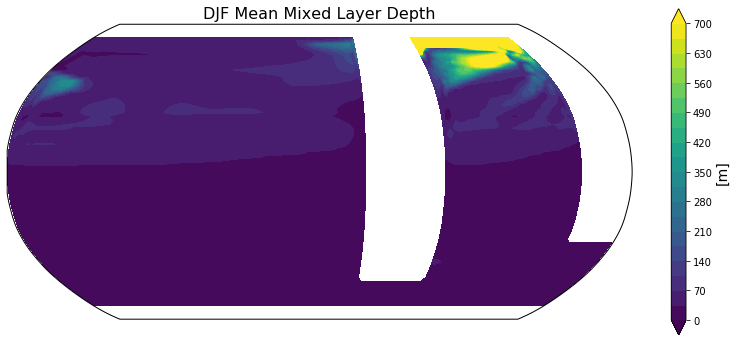

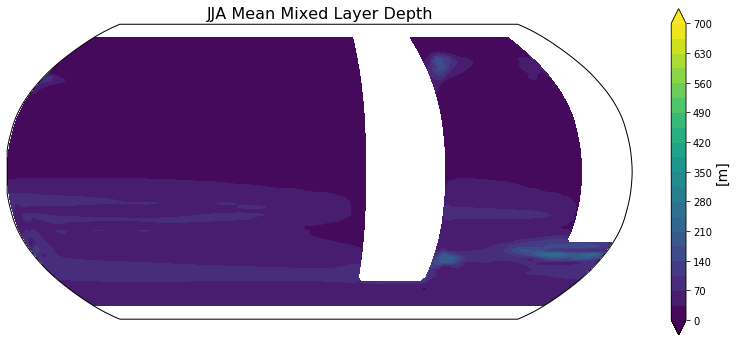

In [8]:
mlt = dm['mlotst'][-31:,:,:]
mlt_djf = np.nanmean(mlt.where(dm['time.season'] == 'DJF'), axis=0)
mlt_jja = np.nanmean(mlt.where(dm['time.season'] == 'JJA'), axis=0)

b = np.linspace(0, 700, 21, endpoint=True)
t = np.linspace(0, 700, 11, endpoint=True)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(dm['xh'], dm['yh'], np.nanmean(mlt, axis=0), b, extend='both',  transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[m]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('Yearly Mean Mixed Layer Depth', fontsize=16)
plt.savefig(fig_path+'MLD_mean.png')
plt.show()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(dm['xh'], dm['yh'], mlt_djf, b, extend='both',  transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[m]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('DJF Mean Mixed Layer Depth', fontsize=16)
plt.savefig(fig_path+'MLD_DJF.png')
plt.show()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(dm['xh'], dm['yh'], mlt_jja, b, extend='both',  transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[m]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('JJA Mean Mixed Layer Depth', fontsize=16)
plt.savefig(fig_path+'MLD_JJA.png')
plt.show()

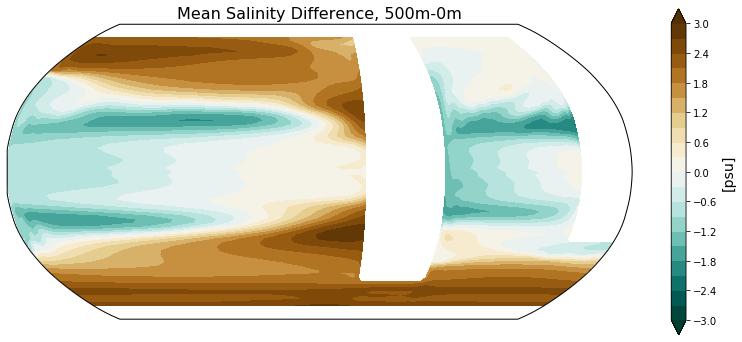

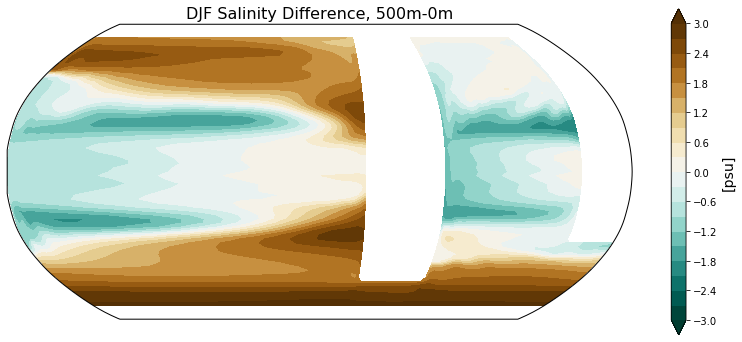

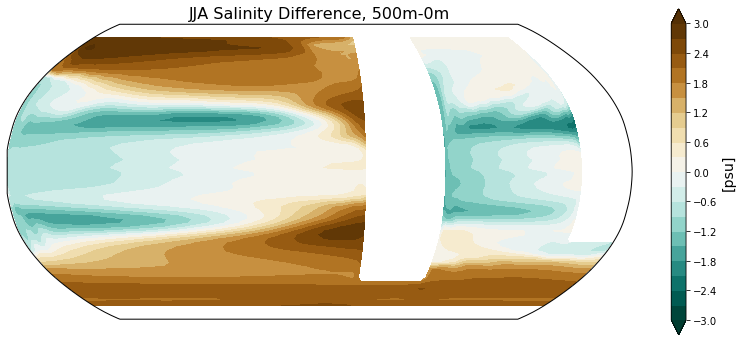

In [9]:
s_diff = dm['so'][-31:,:,:].sel(zl=500, method='nearest') - dm['so'][-31:,:,:].sel(zl=0, method='nearest')
s_diff_djf = np.nanmean(s_diff.where(dm['time.season'] == 'DJF'), axis=0)
s_diff_jja = np.nanmean(s_diff.where(dm['time.season'] == 'JJA'), axis=0)

b = np.linspace(-3, 3, 21, endpoint=True)
t = np.linspace(-3, 3, 11, endpoint=True)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(dm['xh'], dm['yh'], np.nanmean(s_diff, axis=0), 
             b, cmap='BrBG_r', extend='both',  transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[psu]', fontsize=14)
plt.title('Mean Salinity Difference, 500m-0m', fontsize=16)
plt.savefig(fig_path+'sdiff_mean.png')
plt.show()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(dm['xh'], dm['yh'], s_diff_djf, 
             b, cmap='BrBG_r', extend='both',  transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[psu]', fontsize=14)
plt.title('DJF Salinity Difference, 500m-0m', fontsize=16)
plt.savefig(fig_path+'sdiff_DJF.png')
plt.show()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(dm['xh'], dm['yh'], s_diff_jja, 
             b, cmap='BrBG_r', extend='both',  transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[psu]', fontsize=14)
plt.title('JJA Salinity Difference, 500m-0m', fontsize=16)
plt.savefig(fig_path+'sdiff_JJA.png')
plt.show()